In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

### Importing 'df_filled'as the clean data frame:

In [4]:
# Define the file path
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\df_filled.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,Country Name,Country Code,Year,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS
0,Brazil,BRA,2003,1.813401,69.824196,-0.026542,11.015939,-2.692671,-0.483497,5.582337e+11,1.140829,16.417942,11.169
1,Brazil,BRA,2004,2.713532,74.430628,3.912306,14.473780,10.322010,10.364045,6.692894e+11,5.759965,18.855019,10.072
2,Brazil,BRA,2005,1.733894,79.543667,3.855949,9.644190,-2.497390,7.461346,8.916338e+11,3.202132,18.114096,10.551
3,Brazil,BRA,2006,1.753126,82.871431,4.874538,4.837428,8.474882,17.762585,1.107627e+12,3.961989,18.409816,9.692
4,Brazil,BRA,2007,3.190826,85.889006,5.823590,6.176102,15.915422,19.557599,1.397114e+12,6.069871,19.346360,9.280


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          168 non-null    object 
 1   Country Code          168 non-null    object 
 2   Year                  168 non-null    int64  
 3   BX.KLT.DINV.WD.GD.ZS  168 non-null    float64
 4   FP.CPI.TOTL           168 non-null    float64
 5   NE.CON.TOTL.KD.ZG     168 non-null    float64
 6   NE.EXP.GNFS.KD.ZG     168 non-null    float64
 7   NE.GDI.TOTL.KD.ZG     168 non-null    float64
 8   NE.IMP.GNFS.KD.ZG     168 non-null    float64
 9   NY.GDP.MKTP.CD        168 non-null    float64
 10  NY.GDP.MKTP.KD.ZG     168 non-null    float64
 11  NY.GNS.ICTR.ZS        168 non-null    float64
 12  SL.UEM.TOTL.ZS        168 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 17.2+ KB


### Clustering in Using k-Means:

 - Removing any categorical columns from 'df'.

In [8]:
# Drop the categorical columns 'Country Name' and 'Country Code'
df_numeric = df.drop(['Country Name', 'Country Code', 'Year'], axis=1)

# Check the resulting DataFrame
df_numeric.head()

,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS
0,1.813401,69.824196,-0.026542,11.015939,-2.692671,-0.483497,5.582337e+11,1.140829,16.417942,11.169
1,2.713532,74.430628,3.912306,14.473780,10.322010,10.364045,6.692894e+11,5.759965,18.855019,10.072
2,1.733894,79.543667,3.855949,9.644190,-2.497390,7.461346,8.916338e+11,3.202132,18.114096,10.551
3,1.753126,82.871431,4.874538,4.837428,8.474882,17.762585,1.107627e+12,3.961989,18.409816,9.692
4,3.190826,85.889006,5.823590,6.176102,15.915422,19.557599,1.397114e+12,6.069871,19.346360,9.280


 -  Standardizing the data so that each variable has the same scale to avoid bias in the clustering.

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric data
df_scaled = scaler.fit_transform(df_numeric)

# Check the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)
df_scaled.head()

,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS
0,-0.357853,-0.732085,-1.285717,0.731353,-0.288795,-0.229970,-0.461613,-0.947706,-1.117047,1.269811
1,0.371044,-0.670857,-0.195265,1.199944,0.067274,0.245683,-0.428655,0.321067,-0.891009,0.927555
2,-0.422235,-0.602894,-0.210867,0.545460,-0.283452,0.118402,-0.362668,-0.381512,-0.959729,1.077000
3,-0.406662,-0.558662,0.071125,-0.105931,0.016739,0.570100,-0.298566,-0.172797,-0.932301,0.808998
4,0.757541,-0.518553,0.333866,0.075480,0.220305,0.648810,-0.212652,0.406191,-0.845437,0.680457


 - Recalling what every variable means:

**Indicator Names:**

1. `NY.GDP.MKTP.CD` - GDP (current US$)
2. `NY.GDP.MKTP.KD.ZG` - GDP growth (annual %)
3. `NE.CON.TOTL.KD.ZG` - Final consumption expenditure (annual % growth)
4. `NE.GDI.TOTL.KD.ZG` - Gross capital formation (annual % growth)
5. `NE.EXP.GNFS.KD.ZG` - Exports of goods and services (annual % growth)
6. `NE.IMP.GNFS.KD.ZG` - Imports of goods and services (annual % growth)
7. `NY.GNS.ICTR.ZS` - Gross savings (% of GDP)
8. `BX.KLT.DINV.WD.GD.ZS` - Foreign direct investment, net inflows (% of GDP)
9. `FP.CPI.TOTL` - Consumer price index (Proxy for Inflation Rate)
10. `SL.UEM.TOTL.ZS` - Unemployment, total (% of total labor force)

### Using the elbow technique in order to come up with a reasonable number of clusters:

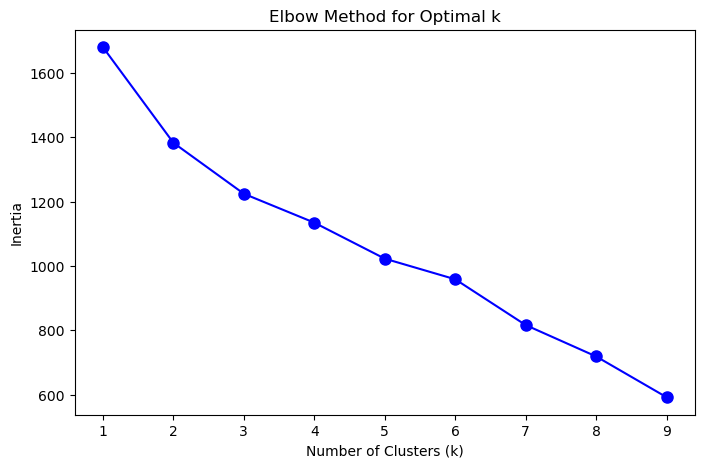

In [14]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# List to store the inertia values for each k
inertia = []

# Loop through the cluster numbers, fit the k-means model, and compute inertia
for i in num_cl:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(num_cl, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Save the figure
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\6.5 Vizs\elbow_plot.png'
plt.savefig(output_path)

# Display the plot
plt.show()

The elbow point in the plot appears around **k=3 or k=4**, where the curve starts to flatten. Choosing **k=3** could provide a balanced segmentation.

### k-Means Clustering:

In [17]:
# Apply k-Means clustering with k=3
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(df_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# View the first few rows to see the assigned clusters
df.head()

# Saving the DataFrame with cluster labels to a CSV file
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Data Bases\clustered_data.csv'
df.to_csv(output_path, index=False)

In [18]:
# Display the DataFrame to see the new 'Cluster' column
df.head()

,Country Name,Country Code,Year,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,NE.CON.TOTL.KD.ZG,NE.EXP.GNFS.KD.ZG,NE.GDI.TOTL.KD.ZG,NE.IMP.GNFS.KD.ZG,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GNS.ICTR.ZS,SL.UEM.TOTL.ZS,Cluster
0,Brazil,BRA,2003,1.813401,69.824196,-0.026542,11.015939,-2.692671,-0.483497,5.582337e+11,1.140829,16.417942,11.169,1
1,Brazil,BRA,2004,2.713532,74.430628,3.912306,14.473780,10.322010,10.364045,6.692894e+11,5.759965,18.855019,10.072,1
2,Brazil,BRA,2005,1.733894,79.543667,3.855949,9.644190,-2.497390,7.461346,8.916338e+11,3.202132,18.114096,10.551,1
3,Brazil,BRA,2006,1.753126,82.871431,4.874538,4.837428,8.474882,17.762585,1.107627e+12,3.961989,18.409816,9.692,1
4,Brazil,BRA,2007,3.190826,85.889006,5.823590,6.176102,15.915422,19.557599,1.397114e+12,6.069871,19.346360,9.280,1


### Creating a Exploratory Visualizations (e.g., scatterplots) Using Clustered Data

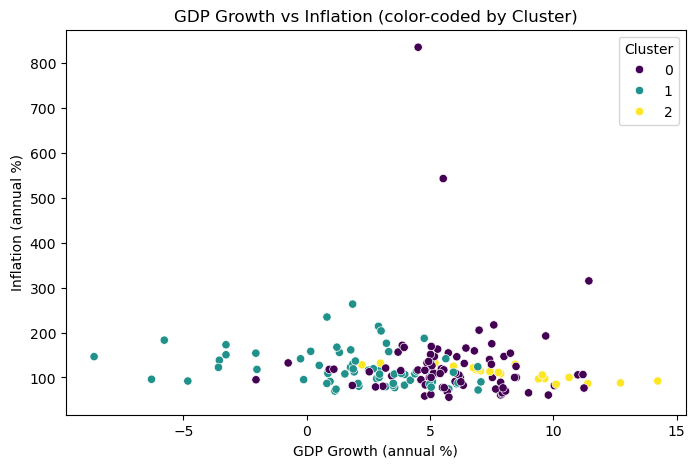

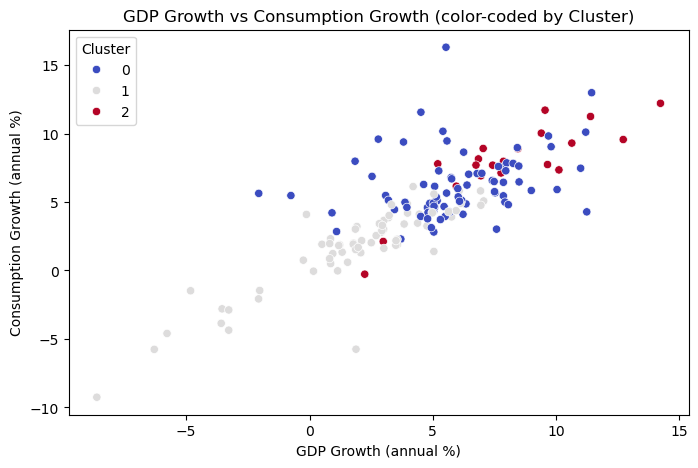

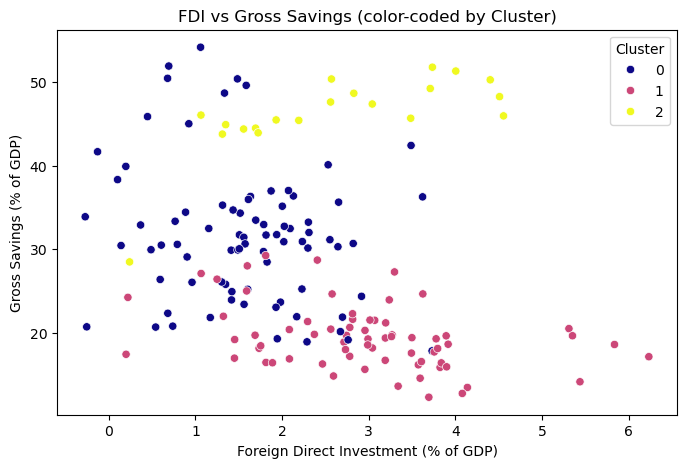

In [37]:
# Set the output path for saving charts
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\6. Advanced Analytics & Dashboard Design\Viz\Final Viz'

# Create scatterplot: GDP Growth vs Inflation, color-coded by cluster
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['NY.GDP.MKTP.KD.ZG'], y=df['FP.CPI.TOTL'], hue=df['Cluster'], palette='viridis')
plt.title('GDP Growth vs Inflation (color-coded by Cluster)')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Inflation (annual %)')
plt.savefig(f'{output_path}/gdp_vs_inflation_clusters.png')
plt.show()

# Create scatterplot: GDP Growth vs Consumption Growth, color-coded by cluster (New Chart)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['NY.GDP.MKTP.KD.ZG'], y=df['NE.CON.TOTL.KD.ZG'], hue=df['Cluster'], palette='coolwarm')
plt.title('GDP Growth vs Consumption Growth (color-coded by Cluster)')
plt.xlabel('GDP Growth (annual %)')
plt.ylabel('Consumption Growth (annual %)')
plt.savefig(f'{output_path}/gdp_vs_consumption_clusters.png')
plt.show()

# Create scatterplot: Foreign Direct Investment vs Gross Savings, color-coded by cluster
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['BX.KLT.DINV.WD.GD.ZS'], y=df['NY.GNS.ICTR.ZS'], hue=df['Cluster'], palette='plasma')
plt.title('FDI vs Gross Savings (color-coded by Cluster)')
plt.xlabel('Foreign Direct Investment (% of GDP)')
plt.ylabel('Gross Savings (% of GDP)')
plt.savefig(f'{output_path}/fdi_vs_savings_clusters.png')
plt.show()

In the **GDP Growth vs Inflation** plot, cluster 0 groups countries with relatively stable inflation and moderate GDP growth, cluster 1 includes countries with extremely high inflation, some surpassing 500%, and moderate GDP growth, while cluster 2 represents countries with low inflation and moderate GDP growth, indicating more stable economies with controlled inflation.

In the **GDP Growth vs Consumption Growth** plot, cluster 0 groups countries with moderate GDP and consumption growth, cluster 1 includes countries with higher consumption growth at varying GDP growth levels, and cluster 2 represents countries with low or negative growth, possibly indicating economic stagnation or contraction.

In the **FDI vs Gross Savings** plot, cluster 0 contains countries with moderate levels of foreign direct investment and gross savings, cluster 1 groups countries with lower savings and moderate FDI, and cluster 2 highlights countries with high savings, potentially reflecting more developed or resource-rich economies.

Overall, the clusters reveal distinct economic patterns, showcasing different stages of economic development, stability, and growth dynamics across countries.
tries.

### Calculating the descriptive statistics for the clusters using the groupby() and loc() functions:

In [23]:
# Select only numeric columns and exclude the 'Year' column
numeric_cols = df.select_dtypes(include='number').columns.drop('Year')

# Use groupby() to calculate descriptive statistics for each cluster for numeric columns
cluster_stats = df.groupby('Cluster')[numeric_cols].agg(['mean', 'std', 'min', 'max', 'median'])

# Display the descriptive statistics
cluster_stats.round(2)


BX.KLT.DINV.WD.GD.ZS                          FP.CPI.TOTL          \
                        mean   std   min   max median        mean     std   
Cluster                                                                     
0                       1.57  0.87 -0.27  3.73   1.57      130.82  102.04   
1                       2.95  1.18  0.20  6.23   2.99      122.26   41.63   
2                       2.62  1.27  0.24  4.55   2.56      110.20   15.62   

                                ... SL.UEM.TOTL.ZS                            \
           min     max  median  ...           mean   std   min    max median   
Cluster                         ...                                            
0        56.05  834.59  111.28  ...           6.78  2.23  3.26  11.97   6.18   
1        69.82  263.22  111.69  ...           8.21  4.08  2.81  19.37   8.06   
2        85.00  132.23  112.23  ...           4.59  0.17  4.31   5.00   4.56   

        Cluster                      
           mean  std min max median  
Cluster                              
0           0.0  0.0   0   0    0.0  
1           1.0  0.0   1   1    1.0  
2           2.0  0.0   2   2    2.0  

[3 rows x 55 columns]

The descriptive statistics and cluster visualizations can help guide future analytics steps. 

1. **Segmentation**: The clusters highlight distinct economic profiles, useful for understanding country groupings. For instance, Cluster 0 shows high inflation, while Cluster 2 shows stable growth.

2. **Prediction Models**: The clusters and stats can feed into prediction models, helping forecast economic performance or identify which countries may shift clusters over time.

3. **Risk Assessment**: Insights from the clusters can guide investment strategies or policy recommendations, assessing economic risks and opportunities.

4. **Time-Series Analysis**: The clusters could be used for time-series analysis to track how countries move between clusters over the years.

5. **Business Strategy**: Companies could tailor market-entry strategies based on the economic profiles of each cluster.

These results provide valuable insights for further analysis and decision-making.